In [5]:
import numpy as np
import cv2 
from scipy.misc.pilutil import imresize
from tensorflow.contrib import predictor
from skimage.feature import hog
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [7]:
im = cv2.imread("E:/niyati/MAchine Learning Projects/MNIST new/Datasets/mnist.jpeg")  

In [8]:
blank_image = np.zeros((im.shape[0],im.shape[1],3), np.uint8)
blank_image.fill(255)

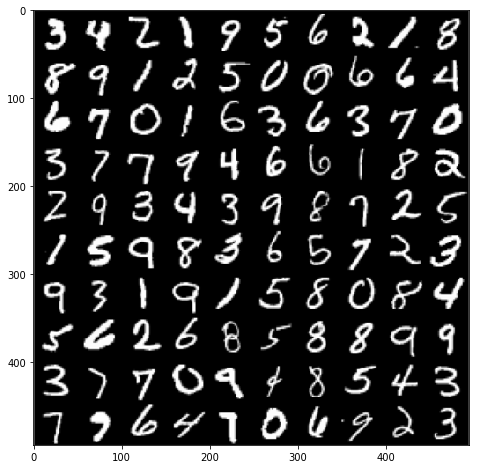

In [9]:
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)
kernel = np.ones((5,5),np.uint8)

In [10]:
retval,threshold = cv2.threshold(imgray,127,255,0)

In [11]:
im2,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)    

[array([[[350, 466]],

       [[351, 467]],

       [[351, 466]]], dtype=int32), array([[[375, 457]],

       [[373, 459]],

       [[371, 459]],

       [[369, 461]],

       [[368, 461]],

       [[363, 466]],

       [[363, 470]],

       [[369, 470]],

       [[370, 469]],

       [[372, 469]],

       [[374, 467]],

       [[376, 467]],

       [[377, 466]],

       [[378, 467]],

       [[378, 468]],

       [[371, 475]],

       [[370, 475]],

       [[370, 476]],

       [[369, 477]],

       [[368, 477]],

       [[365, 480]],

       [[365, 481]],

       [[361, 485]],

       [[361, 486]],

       [[360, 487]],

       [[359, 487]],

       [[359, 488]],

       [[362, 488]],

       [[362, 487]],

       [[379, 470]],

       [[379, 469]],

       [[383, 465]],

       [[384, 465]],

       [[384, 463]],

       [[383, 463]],

       [[381, 461]],

       [[381, 458]],

       [[380, 457]]], dtype=int32), array([[[211, 457]],

       [[211, 460]],

       [[212, 460]],

   

In [12]:
def get_coordinates(contours, hierarchy):

    coordinates = []
    hierarchy = hierarchy[0]
    rect = [cv2.boundingRect(c) for c in contours] 
    u, i = np.unique(hierarchy[:,-1], return_inverse=True)
    common = u[np.argmax(np.bincount(i))]
    
    for r,hr in zip(rect, hierarchy):
        x,y,w,h = r
        if ((w*h)>250) and (10 <= w <= 200) and (10 <= h <= 200) and hr[3] == common: 
            final_bounding_rectangles.append(r)    

    return coordinates


In [13]:
rectangles = get_coordinates(contours,hierarchy)
print(rectangles)

[(359, 457, 26, 32), (211, 457, 21, 35), (160, 457, 35, 28), (12, 457, 21, 35), (65, 456, 23, 35), (456, 452, 25, 35), (259, 452, 29, 35), (409, 450, 23, 35), (313, 450, 22, 35), (112, 448, 29, 36), (113, 408, 26, 35), (207, 406, 32, 35), (63, 406, 21, 35), (313, 405, 18, 35), (456, 404, 28, 35), (354, 404, 35, 32), (266, 404, 16, 35), (408, 403, 29, 35), (158, 403, 35, 33), (12, 403, 28, 35), (259, 362, 19, 23), (406, 359, 29, 35), (461, 357, 18, 35), (10, 357, 35, 30), (359, 355, 27, 35), (311, 353, 22, 36), (215, 353, 20, 36), (114, 351, 31, 36), (58, 351, 35, 34), (162, 350, 24, 35), (158, 309, 30, 35), (12, 309, 24, 35), (407, 307, 35, 32), (67, 307, 17, 36), (455, 304, 34, 35), (359, 304, 28, 35), (311, 304, 25, 35), (257, 304, 35, 35), (208, 304, 26, 35), (359, 260, 25, 35), (164, 258, 27, 35), (109, 258, 28, 35), (451, 256, 35, 36), (62, 256, 29, 35), (405, 255, 35, 33), (313, 255, 25, 35), (16, 255, 21, 35), (207, 253, 30, 35), (266, 251, 16, 35), (359, 210, 21, 36), (259, 209

In [14]:

predict_fn = predictor.from_saved_model("/final_mnist_hopefully/mnist_convnet_model/1519324326")

C:\Users\Niyati\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


INFO:tensorflow:Restoring parameters from b'/final_mnist_hopefully/mnist_convnet_model/1519324326\\variables\\variables'


In [15]:
def pixels_to_hog_20(img_array):
    #print(img_array)
    hog_featuresData = []
    for img in img_array:
        fd = hog(img, 
                 orientations=10, 
                 pixels_per_cell=(5,5),
                 cells_per_block=(1,1), 
                 visualise=False)
        hog_featuresData.append(fd)
    hog_features = np.array(hog_featuresData, 'float64')
    return np.float32(hog_features)

In [16]:
for rect in rectangles:
    x,y,w,h = rect
    cv2.rectangle(im,(x-5,y-3),(x+w+6,y+h+10),(0,0,255),2)
  
    im_digit = imgray[y:y+h,x:x+w]
    im_digit = imresize(im_digit,(28 ,28))
    hog_img_data = pixels_to_hog_20([im_digit]) 
    p = predict_fn({"x": im_digit.flatten().reshape(-1,784)})
    cv2.putText(im, str(int(p['classes'])), (x,y),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)


C:\Users\Niyati\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Niyati\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


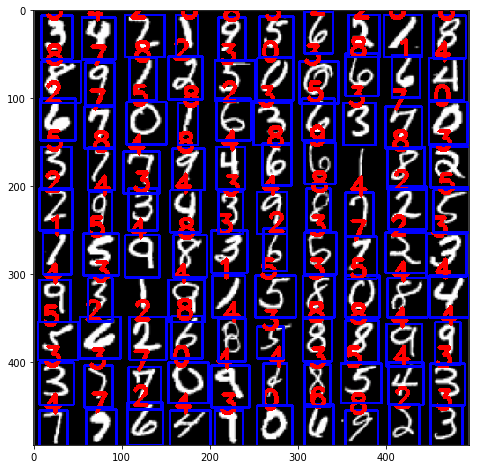

In [17]:
    plt.imshow(im)